## Machine Learning

In [1]:
# Linear Regression - Case Study - Moneyball
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/baseball.csv')
print(df.shape)
df.head()

(1232, 15)


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [12]:
df.loc[:,'RD'] = df.RS - df.RA
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [13]:
moneyball = df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


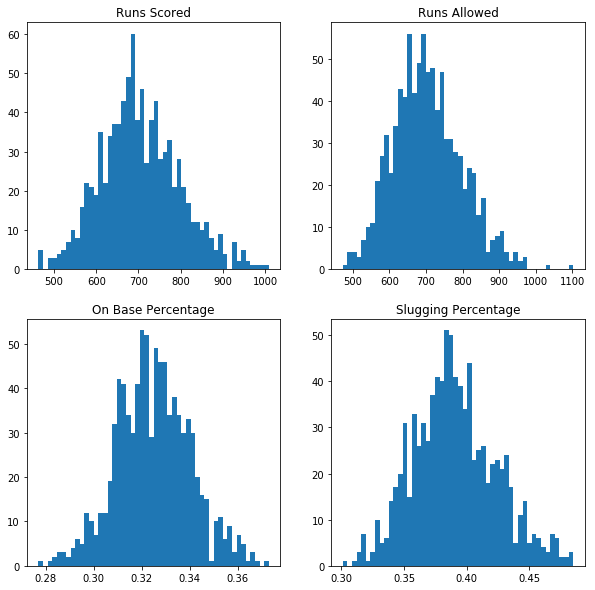

In [14]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins=50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins=50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins=50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins=50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

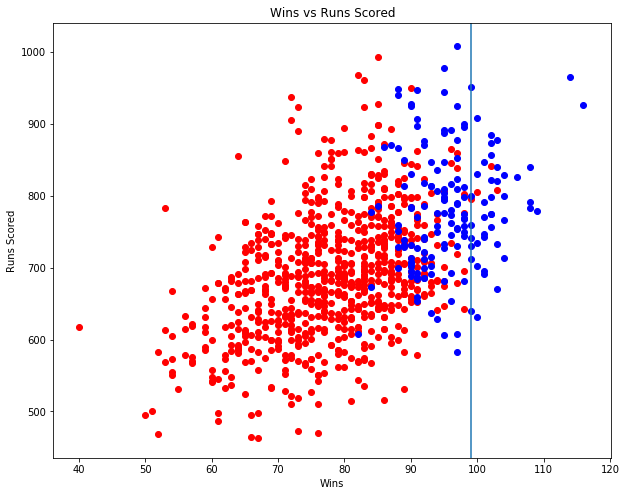

In [15]:
moneyball1 = moneyball.loc[moneyball['Playoffs']==1]
moneyball0 = moneyball.loc[moneyball['Playoffs']==0]

plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W, y=moneyball0.RS, c="Red")
plt.scatter(x=moneyball1.W, y=moneyball1.RS, c="Blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x=99)

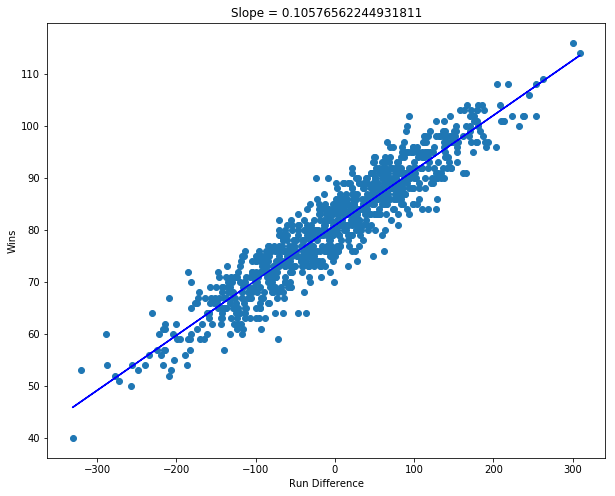

In [26]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)
slope, intercept = np.polyfit(x,y,1)
ablinevalues = [slope*i+intercept for i in x]

plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, ablinevalues,'b')
plt.title("Slope = %s" %(slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

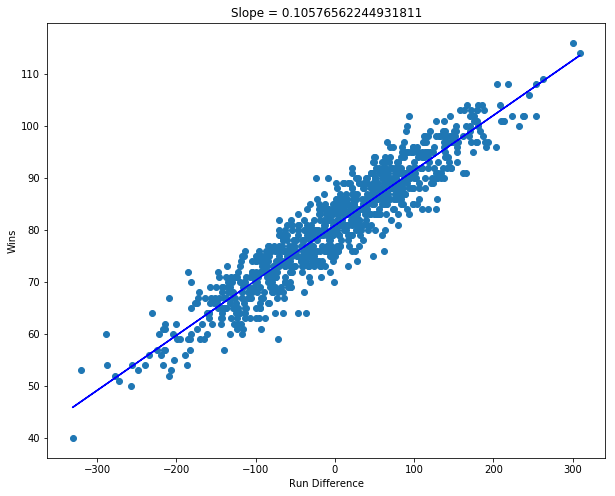

In [17]:
print(np.corrcoef(x,y))

In [27]:
moneyball.isnull().sum()

Team          0
League        0
Year          0
RS            0
RA            0
W             0
OBP           0
SLG           0
BA            0
Playoffs      0
G             0
OOBP        812
OSLG        812
RD            0
dtype: int64

In [22]:
moneyball.drop(['RankSeason','RankPlayoffs'],axis=1,inplace=True)

C:\Users\Prabhakar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [23]:
moneyballnew = moneyball.dropna()
moneyballnew.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


In [24]:
moneyball.isnull().sum()

Team          0
League        0
Year          0
RS            0
RA            0
W             0
OBP           0
SLG           0
BA            0
Playoffs      0
G             0
OOBP        812
OSLG        812
RD            0
dtype: int64

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
x = moneyball[['OBP','SLG','BA']].values
y = moneyball[['RS']].values

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print(model.intercept_)
print(model.coef_)

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


In [ ]:
x = moneyball[['OBP','SLG']].values
y = moneyball[['RS']].values

RS_model = LinearRegression()
RS_model.fit(x,y)

print(RS_model.intercept_)
print(RS_model.coef_)